In [14]:
#%run /content/AppliedML1Prep.ipynb

Training Naive Bayes...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best Naive Bayes Parameters: {'alpha': 0.1}
Naive Bayes - Train Evaluation:
Accuracy: 0.9967, Precision: 0.9923, Recall: 0.9828, F1-score: 0.9875

Naive Bayes - Validation Evaluation:
Accuracy: 0.9821, Precision: 0.9709, Recall: 0.8929, F1-score: 0.9302

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Logistic Regression Parameters: {'C': 0.01}
Logistic Regression - Train Evaluation:
Accuracy: 0.8659, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Logistic Regression - Validation Evaluation:
Accuracy: 0.8660, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best SVM Parameters: {'C': 0.1}
SVM - Train Evaluation:
Accuracy: 0.9257, Precision: 0.9916, Recall: 0.4493, F1-score: 0.6184

SVM - Validation Evaluation:
Accuracy: 0.9330, Precision: 0.9828, Recall: 0.5089, F1-score: 0.6706

Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Train Evaluation:
Accuracy: 0.9100, Precision: 1.0000, Recall: 0.3289, F1-score: 0.4950

Random Forest - Validation Evaluation:
Accuracy: 0.9127, Precision: 1.0000, Recall: 0.3482, F1-score: 0.5166

Selecting the best model...
Naive Bayes - Validation Evaluation:
Accuracy: 0.9821, Precision: 0.9709, Recall: 0.8929, F1-score: 0.9302

Logistic Regression - Validation Evaluation:
Accuracy: 0.8660, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM - Validation Evaluation:
Accuracy: 0.9330, Precision: 0.9828, Recall: 0.5089, F1-score: 0.6706

Random Forest - Validation Evaluation:
Accuracy: 0.9127, Precision: 1.0000, Recall: 0.3482, F1-score: 0.5166

Best model selected. Evaluating on test set...
Test Evaluation:
Accuracy: 0.9857, Precision: 0.9545, Recall: 0.9375, F1-score: 0.9459



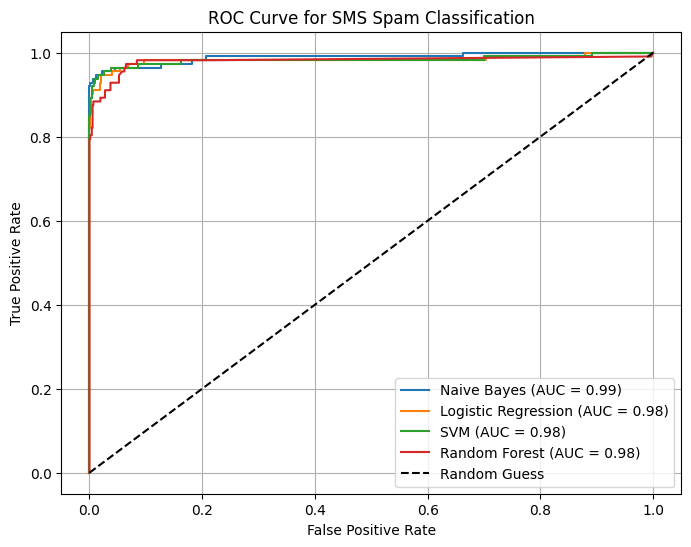

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
)
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def load_splits(train_path="train.csv", val_path="validation.csv", test_path="test.csv"):
    """Load train, validation, and test datasets."""
    train_df = pd.read_csv(train_path)
    val_df = pd.read_csv(val_path)
    test_df = pd.read_csv(test_path)
    return train_df, val_df, test_df

def vectorize_data(train_df, val_df, test_df):
    """Convert text into TF-IDF vectors."""
    vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
    X_train = vectorizer.fit_transform(train_df["message"])
    X_val = vectorizer.transform(val_df["message"])
    X_test = vectorizer.transform(test_df["message"])

    y_train, y_val, y_test = train_df["label"], val_df["label"], test_df["label"]

    return X_train, X_val, X_test, y_train, y_val, y_test, vectorizer

def evaluate_model(model, X, y, dataset_name="Dataset"):
    """Evaluate model and return scores."""
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label='spam') # Added pos_label='spam'
    recall = recall_score(y, y_pred, pos_label='spam')     # Added pos_label='spam'
    f1 = f1_score(y, y_pred, pos_label='spam')            # Added pos_label='spam'


    print(f"{dataset_name} Evaluation:")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

    return acc, precision, recall, f1

def plot_roc_curve(models, X_test, y_test):
    """Plot ROC curve for all models."""
    plt.figure(figsize=(8, 6))

    # Convert string labels to numerical for ROC curve
    y_test_numeric = y_test.map({'ham': 0, 'spam': 1})  # Assuming 'spam' is the positive class

    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
        else:
            y_scores = model.decision_function(X_test)  # Decision function for SVM

        # Use y_test_numeric for roc_curve
        fpr, tpr, _ = roc_curve(y_test_numeric, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for SMS Spam Classification")
    plt.legend()
    plt.grid()
    plt.show()

# ========================= Model Training Functions ==========================
def train_naive_bayes(X_train, y_train):
    param_grid = {"alpha": [0.1, 0.5, 1, 5]}
    model = MultinomialNB()
    grid_search = GridSearchCV(model, param_grid, scoring="f1", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Naive Bayes Parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

def train_logistic_regression(X_train, y_train):
    param_grid = {"C": [0.01, 0.1, 1, 10]}
    model = LogisticRegression(max_iter=1000)
    grid_search = GridSearchCV(model, param_grid, scoring="f1", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Logistic Regression Parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

def train_svm(X_train, y_train):
    param_grid = {"C": [0.1, 1, 10]}
    model = SVC(kernel="linear", probability=True)
    grid_search = GridSearchCV(model, param_grid, scoring="f1", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best SVM Parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

def train_random_forest(X_train, y_train):
    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10]
    }
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, scoring="f1", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Random Forest Parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

def main():
    # Load and vectorize data
    train_df, val_df, test_df = load_splits()
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = vectorize_data(train_df, val_df, test_df)

    # Train models separately
    print("Training Naive Bayes...")
    nb_model = train_naive_bayes(X_train, y_train)
    evaluate_model(nb_model, X_train, y_train, "Naive Bayes - Train")
    evaluate_model(nb_model, X_val, y_val, "Naive Bayes - Validation")

    print("Training Logistic Regression...")
    lr_model = train_logistic_regression(X_train, y_train)
    evaluate_model(lr_model, X_train, y_train, "Logistic Regression - Train")
    evaluate_model(lr_model, X_val, y_val, "Logistic Regression - Validation")

    print("Training SVM...")
    svm_model = train_svm(X_train, y_train)
    evaluate_model(svm_model, X_train, y_train, "SVM - Train")
    evaluate_model(svm_model, X_val, y_val, "SVM - Validation")

    print("Training Random Forest...")
    rf_model = train_random_forest(X_train, y_train)
    evaluate_model(rf_model, X_train, y_train, "Random Forest - Train")
    evaluate_model(rf_model, X_val, y_val, "Random Forest - Validation")

    # Compare models and select the best
    print("Selecting the best model...")
    models = {
        "Naive Bayes": nb_model,
        "Logistic Regression": lr_model,
        "SVM": svm_model,
        "Random Forest": rf_model
    }
    best_model, best_f1 = None, 0

    for name, model in models.items():
        _, _, _, f1 = evaluate_model(model, X_val, y_val, f"{name} - Validation")
        if f1 > best_f1:
            best_f1 = f1
            best_model = model

    print("Best model selected. Evaluating on test set...")
    evaluate_model(best_model, X_test, y_test, "Test")

    # Plot ROC curve
    plot_roc_curve(models, X_test, y_test)

if __name__ == "__main__":
    main()
